In [37]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

X = np.array([258.0,270.0,294.0,320.0,342.0,396.0,368.0,446.0,480.0,586.0])[:,np.newaxis]
y = np.array([236.0,234.0,252.0,298.0,314.0,342.0,360.0,391.2,390.8,312.0])[:,np.newaxis]

In [38]:
lr = LinearRegression() # for Simple linear Regression
pr = LinearRegression() # for Polynomial Regression
quadratic = PolynomialFeatures(degree=2) # pass degree = 2

X_quad = quadratic.fit_transform(X) # Normalization

In [39]:
# Training the linear regression model for comparison
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [40]:
# Fit the multiple linear regression model by considering the polynomial regression
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

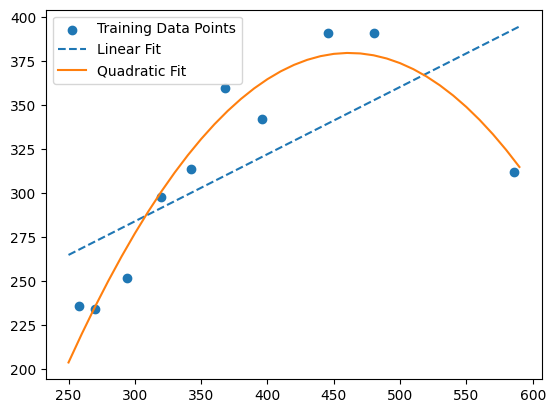

In [41]:
# Plot the results
plt.scatter(X,y,label='Training Data Points')
plt.plot(X_fit,y_lin_fit,label='Linear Fit',linestyle='--')
plt.plot(X_fit,y_quad_fit,label='Quadratic Fit')
plt.legend(loc='upper left')
plt.show()

In [46]:
y_lin_pred=lr.predict(X) # Linear Regression
y_quad_pred=pr.predict(X_quad) # Polynomial Regression

# Mean Squared Error
print('Training MSE of Linear Model: %.3f, Quadratic: %.3f'% (mean_squared_error(y,y_lin_pred),mean_squared_error(y, y_quad_pred)))
# R^2 Score
print('Training R^2 of Linear Model: %.3f, Quadratic: %.3f'% (r2_score(y,y_lin_pred),r2_score(y, y_quad_pred)))

Training MSE of Linear Model: 1727.534, Quadratic: 177.514
Training R^2 of Linear Model: 0.449, Quadratic: 0.943


In [52]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt', header=None, sep='\\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [53]:
X = df[['LSTAT']].values
y = df[['MEDV']].values

In [54]:
regr = LinearRegression()

In [55]:
# Creating Quadratic Features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [56]:
# Fit the features // Training
X_fit=np.arange(X.min(), X.max(),1)[:, np.newaxis]
regr=regr.fit(X,y)
y_lin_fit=regr.predict(X_fit)
linear_r2=r2_score(y,regr.predict(X))

In [58]:
regr=regr.fit(X_quad,y)
y_quad_fit=regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2=r2_score(y,regr.predict(X_quad))

In [59]:
regr=regr.fit(X_cubic,y)
y_cubic_fit=regr.predict(cubic.fit_transform(X_fit))
cubic_r2=r2_score(y,regr.predict(X_cubic))

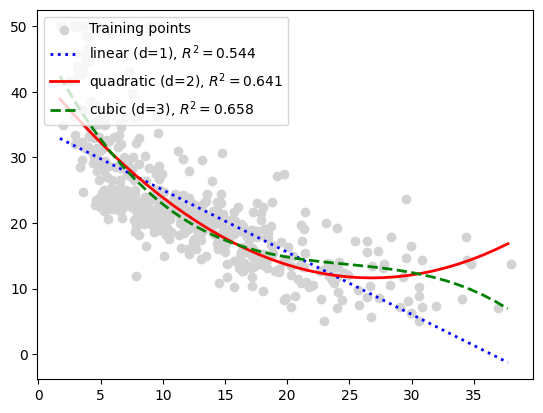

In [61]:
plt.scatter(X,y,label='Training points',color='lightgray')
plt.plot(X_fit, y_lin_fit,label='linear (d=1), $R^2=%.3f$'% linear_r2,color='blue',lw=2,linestyle=':')
plt.plot(X_fit, y_quad_fit,label='quadratic (d=2), $R^2=%.3f$'% quadratic_r2,color='red',lw=2,linestyle='-')
plt.plot(X_fit, y_cubic_fit,label='cubic (d=3), $R^2=%.3f$'% cubic_r2,color='green',lw=2,linestyle='--')
plt.legend(loc='upper left')
plt.show()
